# Load Dataset + Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
from ast import literal_eval
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk

In [ ]:
df_predicted = pd.read_csv('/content/drive/MyDrive/Studi Independen/FP/(SHOWCASE) Dataset Dashboard Visualization/cust_test_label.csv')

In [ ]:
df_trans = pd.read_csv('/content/drive/MyDrive/Studi Independen/FP/Mockup Datasets/transactions.csv')
df_click = pd.read_csv('/content/drive/MyDrive/Studi Independen/FP/Mockup Datasets/click_stream.csv')
df_predicted = pd.read_csv('/content/drive/MyDrive/Studi Independen/FP/(SHOWCASE) Dataset Dashboard Visualization/cust_test_label.csv')

In [ ]:
df_used = [df_trans, df_click, df_predicted]
for i in df_used:
  i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

# Union Dataset

## Monthly Churn Cohort on Fashion Campus

### Data Preparation

In [ ]:
# remove duplicates
df_trans= df_trans[~df_trans.duplicated()]

# remove records with customer ID NULL
df_trans = df_trans[df_trans['customer_id'].notnull()].copy()

# convert customerid to int
df_trans['customer_id'] = (df_trans['customer_id']).astype(int)

In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

### Slice Data Range

In [ ]:
df_trans1 = df_trans[['created_at','customer_id','product_metadata','payment_status','total_amount']]
df_trans1 = df_trans1[(pd.to_datetime(df_trans1['created_at']) >= pd.to_datetime('2021-04-01T00:49:59.408424Z')) &
                               (pd.to_datetime(df_trans1['created_at']) < pd.to_datetime('2022-08-01T00:49:59.408424Z'))]
df_trans1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396725 entries, 22 to 852581
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   created_at        396725 non-null  object
 1   customer_id       396725 non-null  int64 
 2   product_metadata  396725 non-null  object
 3   payment_status    396725 non-null  object
 4   total_amount      396725 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 18.2+ MB


### Get Transaction Month

In [ ]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

# Create the invoicemonth period column

df_trans1['created_at'] = pd.to_datetime(df_trans1['created_at'])
df_trans1['trans_month'] = df_trans1['created_at'].apply(get_month)
df_trans1.head(15)

,created_at,customer_id,product_metadata,payment_status,total_amount,trans_month
22,2021-04-12 11:07:35.365620+00:00,4774,"[{'product_id': 39204, 'quantity': 1, 'item_pr...",Success,93400,2021-04-01
23,2021-05-29 10:59:02.365620+00:00,4774,"[{'product_id': 6572, 'quantity': 1, 'item_pri...",Success,164335,2021-05-01
24,2021-07-15 11:06:17.365620+00:00,4774,"[{'product_id': 18001, 'quantity': 1, 'item_pr...",Success,75865,2021-07-01
25,2021-08-31 11:05:02.365620+00:00,4774,"[{'product_id': 10460, 'quantity': 4, 'item_pr...",Success,2091956,2021-08-01
26,2021-10-17 11:45:13.365620+00:00,4774,"[{'product_id': 2334, 'quantity': 1, 'item_pri...",Success,450657,2021-10-01
27,2021-12-03 11:55:49.365620+00:00,4774,"[{'product_id': 18477, 'quantity': 1, 'item_pr...",Success,488031,2021-12-01
28,2022-01-19 11:25:46.365620+00:00,4774,"[{'product_id': 33212, 'quantity': 3, 'item_pr...",Success,1078709,2022-01-01
29,2022-03-07 10:53:30.365620+00:00,4774,"[{'product_id': 21995, 'quantity': 1, 'item_pr...",Success,311231,2022-03-01
30,2022-04-23 11:43:52.365620+00:00,4774,"[{'product_id': 51055, 'quantity': 1, 'item_pr...",Success,117133,2022-04-01
31,2022-06-09 12:18:09.365620+00:00,4774,"[{'product_id': 18476, 'quantity': 1, 'item_pr...",Success,245215,2022-06-01


In [ ]:
df_trans1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396725 entries, 22 to 852581
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   created_at        396725 non-null  datetime64[ns, UTC]
 1   customer_id       396725 non-null  int64              
 2   product_metadata  396725 non-null  object             
 3   payment_status    396725 non-null  object             
 4   total_amount      396725 non-null  int64              
 5   trans_month       396725 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(2), object(2)
memory usage: 21.2+ MB


### Grouping Month by Customer ID

In [ ]:
# Group by customerID and select only the invoicemonth column
grouping = df_trans1.groupby('customer_id')['trans_month']

# Take the earliest date of each customer and assign it back to the orignal dataset
df_trans1['cohort_month'] = grouping.transform('min')

### Count Cohort Index

In [ ]:
# This function gets us the integer value of year and month
def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month

# Get year and date
invoice_year, invoice_month = get_date_int(df_trans1, 'trans_month')
cohort_year, cohort_month = get_date_int(df_trans1, 'cohort_month')

# Calculate difference in years and months
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
df_trans1['cohort_index'] = years_diff * 12 + months_diff + 1
df_trans1.head()

,created_at,customer_id,product_metadata,payment_status,total_amount,trans_month,cohort_month,cohort_index
22,2021-04-12 11:07:35.365620+00:00,4774,"[{'product_id': 39204, 'quantity': 1, 'item_pr...",Success,93400,2021-04-01,2021-04-01,1
23,2021-05-29 10:59:02.365620+00:00,4774,"[{'product_id': 6572, 'quantity': 1, 'item_pri...",Success,164335,2021-05-01,2021-04-01,2
24,2021-07-15 11:06:17.365620+00:00,4774,"[{'product_id': 18001, 'quantity': 1, 'item_pr...",Success,75865,2021-07-01,2021-04-01,4
25,2021-08-31 11:05:02.365620+00:00,4774,"[{'product_id': 10460, 'quantity': 4, 'item_pr...",Success,2091956,2021-08-01,2021-04-01,5
26,2021-10-17 11:45:13.365620+00:00,4774,"[{'product_id': 2334, 'quantity': 1, 'item_pri...",Success,450657,2021-10-01,2021-04-01,7


In [ ]:
df_trans1.nunique()

created_at          396725
customer_id          40879
product_metadata    396720
payment_status           2
total_amount        281640
trans_month             16
cohort_month            16
cohort_index            16
dtype: int64

### Grouping Transaction Month and Cohort Index

In [ ]:
grouping = df_trans1.groupby(['cohort_month', 'cohort_index'])

# Count the number of unique values per Customer ID
cohort_data = grouping['customer_id'].apply(pd.Series.nunique).reset_index()

# Create a pivot
cohort_counts = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='customer_id')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

In [ ]:
cohort_counts

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cohort_month,,,,,,,,,,,,,,,,
2021-04-01,13199.0,8023.0,9182.0,9483.0,9448.0,9697.0,9308.0,8787.0,10253.0,9505.0,9417.0,9027.0,9513.0,9410.0,8828.0,4879.0
2021-05-01,5708.0,1033.0,1921.0,2254.0,1935.0,2376.0,2129.0,2861.0,1610.0,1757.0,2398.0,2145.0,2206.0,1640.0,188.0,NaN
2021-06-01,3515.0,257.0,625.0,982.0,1033.0,964.0,441.0,1644.0,723.0,1101.0,948.0,871.0,322.0,179.0,NaN,NaN
2021-07-01,3776.0,577.0,716.0,913.0,1514.0,749.0,1783.0,642.0,1445.0,1010.0,722.0,691.0,437.0,NaN,NaN,NaN
2021-08-01,2607.0,441.0,558.0,552.0,643.0,598.0,1314.0,520.0,631.0,574.0,544.0,335.0,NaN,NaN,NaN,NaN
2021-09-01,1896.0,375.0,461.0,456.0,487.0,809.0,437.0,476.0,472.0,443.0,263.0,NaN,NaN,NaN,NaN,NaN
2021-10-01,1829.0,422.0,514.0,562.0,443.0,656.0,554.0,500.0,507.0,317.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-01,1956.0,406.0,486.0,512.0,599.0,451.0,556.0,466.0,317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-01,477.0,134.0,181.0,163.0,234.0,177.0,183.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualization of Monthly Cohort Using SNS

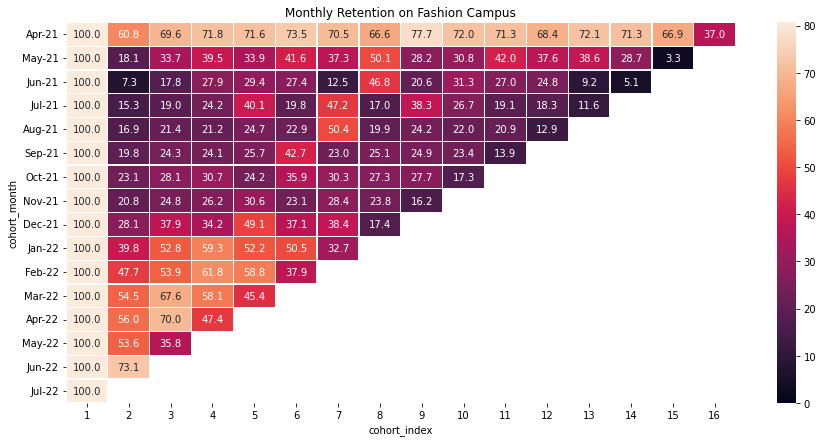

In [ ]:
month_list = retention.reset_index()['cohort_month']

def get_month_name(x):
   return dt.datetime.strftime(x, '%b-%y')

month_list = month_list.apply(get_month_name)

plt.figure(figsize=(15,7))
plt.title('Monthly Retention on Fashion Campus')
sns.heatmap(data=retention,
  annot = True,
  cmap = "rocket",
  vmin = 0.0,
  vmax = list(retention.max().sort_values(ascending = False))[1]+3,
  fmt = '.1f',
  linewidth = 0.3,
  yticklabels=month_list)
plt.show();

Didasarkan pada visualisasi di atas, dapat dipastikan bahwa <br>
1) Pengguna lama per-April 2021, lebih mungkin untuk melakukan transaksi secara berketerusan. Hal ini ditunukkan pada baris Apr-21 menunjukkan angka persentase yang cenderung stabil. <br>
2) Pada beberapa kolom yang menunjukkan transaksi pada (Dec-21: 77.7% untuk pengguna paling lama dan Jul-22: 73.1%; Jun-22: 70.0%; May-22: 67.6% pada non-pengguna lama). Hal ini cukup menunjukkan kecenderungannya pengguna kembali melakukan transaksi pada bulan-bulan tersebut. Apabila dikaitkan dengan waktu pada bulan tersebut, dapat dikatakan bahwa waktu-waktu tersebut termasuk dalam waktu lebaran dan nataru.

## Total Transaction

In [ ]:
df_trans2 = df_trans[['booking_id','created_at','customer_id','total_amount']]

df_trans2['created_at'] = pd.to_datetime(df_trans2['created_at'])
df_trans2['year'] = df_trans2['created_at'].apply(lambda x: x.year)

<ipython-input-17-4e8e17f11ee1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans2['created_at'] = pd.to_datetime(df_trans2['created_at'])
<ipython-input-17-4e8e17f11ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans2['year'] = df_trans2['created_at'].apply(lambda x: x.year)


### Count Value

In [ ]:
trans_total = pd.DataFrame(df_trans2.groupby('year')['booking_id'].count())
trans_total

,booking_id
year,
2016,4833
2017,34111
2018,73127
2019,116794
2020,172908
2021,256216
2022,194595


Dapat dikatakan adanya peningkatan pada tahun 2019-2022 yang cukup tinggi. Hal ini dapat dikatakan searah dengan kenaikan penggunaan alat elektronik yang berkaitan dengan masa pandemi COVID-19.

## Weighed Search Keyword

### Metadata Processing

In [ ]:
df_add_promo = df_click[df_click['event_name']=='ADD_PROMO']
df_add_to_cart = df_click[df_click['event_name']=='ADD_TO_CART']
df_booking = df_click[df_click['event_name']=='BOOKING']
df_search = df_click[df_click['event_name']=='SEARCH']

In [ ]:
df_search.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173266 entries, 5 to 12833601
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   session_id      1173266 non-null  object
 1   event_name      1173266 non-null  object
 2   event_time      1173266 non-null  object
 3   event_id        1173266 non-null  object
 4   traffic_source  1173266 non-null  object
 5   event_metadata  1173266 non-null  object
dtypes: object(6)
memory usage: 62.7+ MB


In [ ]:
event_data = [df_search]
for i in event_data :
  i['event_metadata'] = i['event_metadata'].apply(literal_eval)
  i[list(i["event_metadata"].head(1).tolist()[0].keys())] = i["event_metadata"].apply(
    lambda x: pd.Series([x[key] for key in x.keys()]))


<ipython-input-21-c82710b2285e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['event_metadata'] = i['event_metadata'].apply(literal_eval)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# df_search.info()
df_search = df_search[['session_id','event_time', 'search_keywords']]
df_search.sample(10)

,session_id,event_time,search_keywords
2500754,01455d2d-a503-4ad3-bbd2-5e8160f3f97c,2019-05-16T06:37:55.739848Z,Barang Bekas
8792222,fdc2cb28-8543-4d98-8d9d-0dafdae2e8e3,2020-09-02T14:00:30.018824Z,Tas Kerja
8118253,678f23d9-48e3-49a9-8ffc-91d374367136,2021-09-16T21:21:12.737548Z,Kaos
1294774,8270f70b-339d-4e5d-ac0d-b07b3657e8fc,2019-01-02T20:53:49.706710Z,Bekas
9895645,92efe02c-f08f-479e-86ac-407629c0ee62,2019-10-26T19:14:06.472587Z,Dress Kondangan
2517054,93600129-e4bd-4d40-a926-f60a46b7d331,2022-06-11T09:34:50.921146Z,Dress Kondangan
8183120,1130977c-0b42-4f42-a609-e0dd8227f6bf,2021-07-08T18:54:30.165383Z,Dress Kondangan
11147976,3d03679c-5cbc-436f-a38d-f2056f8a054b,2021-05-15T06:34:51.504170Z,Baju
2244991,876415b0-9358-495a-9f87-cee9d8c6f30f,2020-10-08T04:53:33.141591Z,Dress Kondangan
2730533,b3026f9c-0697-4aa9-9ae0-d53bb7945362,2020-10-11T09:43:48.259499Z,Bekas


### WordCloud

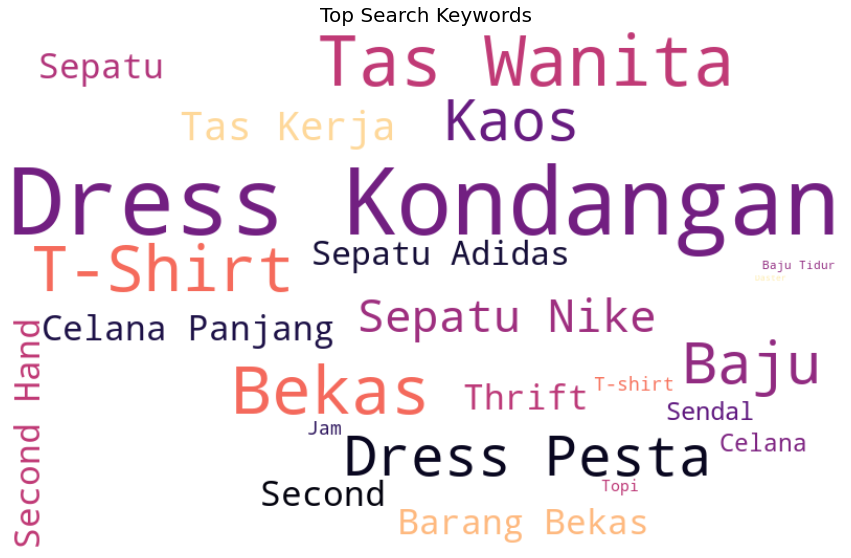

In [ ]:
def Freq_df(cleanwordlist):
  Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
  df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
  df_freq.columns = ['Frequency']
  df_freq.index.name = 'Term'
  df_freq = df_freq.sort_values(by=['Frequency'], ascending=False)
  df_freq = df_freq.reset_index()
  return df_freq

def Word_Cloud(data, color_background, colormap, title):
  plt.figure(figsize=(15,10))
  wc = WordCloud(width=800,
                 height=500,
                 max_words=50,
                 colormap= colormap,
                 max_font_size=150,
                 random_state=88,
                 background_color=color_background).generate_from_frequencies(data)
  plt.imshow(wc, interpolation='bilinear')
  plt.title(title, fontsize=20)
  plt.axis('off')
  plt.show()

freq_df = Freq_df(df_search['search_keywords'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data, 'white', 'magma', 'Top Search Keywords')


### Weighed Search Keywords

In [ ]:
freq_df['Weigh'] = freq_df['Frequency']/(freq_df['Frequency'].max())
freq_df[:10]

,Term,Frequency,Weigh
0,Dress Kondangan,256194,1.000000
1,Tas Wanita,128790,0.502705
2,Bekas,112269,0.438219
3,T-Shirt,100087,0.390669
4,Baju,83873,0.327381
5,Kaos,83759,0.326936
6,Dress Pesta,76829,0.299886
7,Sepatu Nike,51578,0.201324
8,Tas Kerja,38677,0.150968
9,Second Hand,28429,0.110967


Melalui kata pencarian, dapat menggambarkan sebagian besar profil gender dari para pengguna yang ada di Fashion Campus. Melalui search keyword ini, dapat dilakukan perencanaan bisnis menyangkut search keyword yang paling banyak dicari. Bahkan meningkatkan penjualan melalui keyword ini. Hal ini mengindikasikan bahwa modus dari search keyword ini sebanding dengan demand atau permintaan pasar dari para pengguna Fashion Campus.

# Predicted Churn Data

In [ ]:
df_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18346 entries, 0 to 18345
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     18346 non-null  int64  
 1   full_name                       18346 non-null  object 
 2   gender                          18346 non-null  object 
 3   device_type                     18346 non-null  object 
 4   home_location                   18346 non-null  object 
 5   age                             18346 non-null  int64  
 6   usertime                        18346 non-null  int64  
 7   cat_age                         18346 non-null  object 
 8   cat_usertime                    18346 non-null  object 
 9   customer_age_years              18346 non-null  int64  
 10  account_age_months              18346 non-null  int64  
 11  gender_female                   18346 non-null  int64  
 12  gender_male                     

In [ ]:
df_predicted['is_churn'] = df_predicted['is_churn'].replace(['No Churn'], 0)
df_predicted['is_churn'] = df_predicted['is_churn'].replace(['Churn'], 1)
df_predicted.sample(10)

,customer_id,full_name,gender,device_type,home_location,age,usertime,cat_age,cat_usertime,customer_age_years,...,payment_linkaja_total,payment_ovo_total,payment_failed_total,payment_success_total,session_duration_minutes_total,session_duration_minutes_avg,using_mobile_total,using_web_total,transaction_recency_days,is_churn
6658,40732,Eka Purwanti,Female,Android,Sumatera Barat,27,59,Gen Z,3-5 Years,27,...,0,1,0,1,11880,11880.000000,1,0,60,1
14945,79608,Harjo Pratama,Male,iOS,Nusa Tenggara Barat,22,13,Gen Z,1-3 Years,22,...,0,0,0,1,14777,14777.000000,1,0,41,1
3716,95065,Janet Uyainah,Female,iOS,Yogyakarta,21,11,Gen Z,< 1 Years,21,...,0,0,1,3,19155,4788.750000,4,0,15,0
2394,43600,Rusman Nugroho,Male,iOS,Jawa Tengah,16,17,Gen Z,1-3 Years,16,...,0,2,1,2,8049,2683.000000,3,0,15,0
10435,32510,Elon Rajata,Male,iOS,Kalimantan Selatan,41,25,Gen Y,1-3 Years,41,...,0,0,0,1,8347,8347.000000,1,0,41,1
14203,19116,Zulfa Hariyah,Female,Android,Kalimantan Timur,28,40,Gen Y,3-5 Years,28,...,1,1,1,2,44063,14687.666667,3,0,18,0
14927,59903,Safina Melani,Female,Android,Jakarta Raya,20,21,Gen Z,1-3 Years,20,...,0,0,0,2,4794,2397.000000,2,0,30,1
3862,50616,Michelle Nasyidah,Female,Android,Jawa Barat,45,37,Gen Y,3-5 Years,45,...,0,0,0,1,3073,3073.000000,1,0,59,1
724,43970,Melinda Haryanti,Female,Android,Jawa Barat,40,64,Gen Y,> 5 Years,40,...,0,0,0,1,76,76.000000,1,0,55,1
9349,78970,Ajeng Utami,Female,Android,Lampung,23,4,Gen Z,< 1 Years,23,...,0,0,1,13,167,11.928571,12,2,5,0


## Weighed Search Keywords on Churn User

### Merging Data on Search DF and Customer

In [ ]:
df_trans2 = df_trans[['customer_id','session_id']]
df_trans2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  852584 non-null  int64 
 1   session_id   852584 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.5+ MB


In [ ]:
df_churn = df_predicted[['customer_id', 'is_churn']]
df_churn = df_churn[df_churn['is_churn'] == 1]
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7478 entries, 2 to 18345
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  7478 non-null   int64
 1   is_churn     7478 non-null   int64
dtypes: int64(2)
memory usage: 175.3 KB


In [ ]:
df_cust_search = pd.merge(df_search, df_trans2, on=["session_id"])
df_churn_search = pd.merge(df_churn, df_cust_search, on=["customer_id"])
df_churn_search.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168699 entries, 0 to 168698
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      168699 non-null  int64 
 1   is_churn         168699 non-null  int64 
 2   session_id       168699 non-null  object
 3   event_time       168699 non-null  object
 4   search_keywords  168699 non-null  object
dtypes: int64(2), object(3)
memory usage: 7.7+ MB


### WordCloud

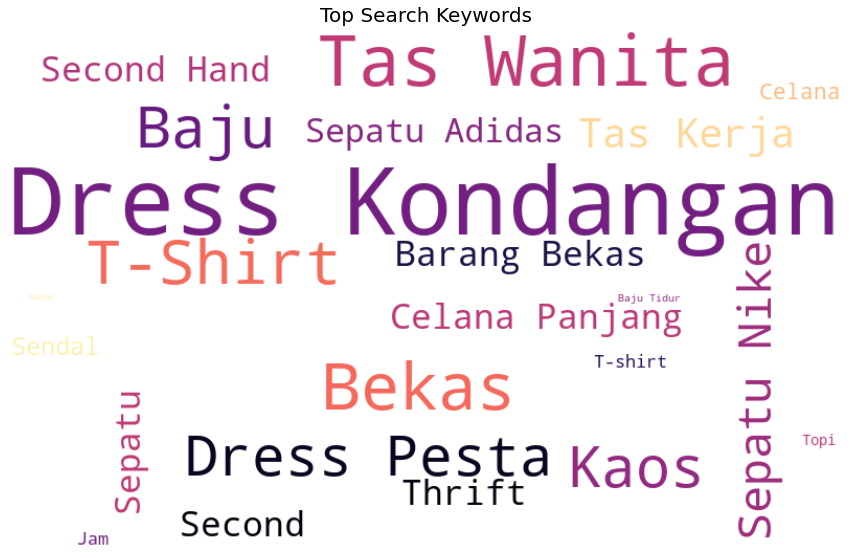

In [ ]:
def Freq_df(cleanwordlist):
  Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
  df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
  df_freq.columns = ['Frequency']
  df_freq.index.name = 'Term'
  df_freq = df_freq.sort_values(by=['Frequency'], ascending=False)
  df_freq = df_freq.reset_index()
  return df_freq

def Word_Cloud(data, color_background, colormap, title):
  plt.figure(figsize=(15,10))
  wc = WordCloud(width=800,
                 height=500,
                 max_words=50,
                 colormap= colormap,
                 max_font_size=150,
                 random_state=88,
                 background_color=color_background).generate_from_frequencies(data)
  plt.imshow(wc, interpolation='bilinear')
  plt.title(title, fontsize=20)
  plt.axis('off')
  plt.show()

freq_df = Freq_df(df_churn_search['search_keywords'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data, 'white', 'magma', 'Top Search Keywords')

### Weighed Search Keywords on Churn User

In [ ]:
freq_df['Weigh'] = freq_df['Frequency']/(freq_df['Frequency'].max())
freq_df[:10]

,Term,Frequency,Weigh
0,Dress Kondangan,37710,1.000000
1,Tas Wanita,18992,0.503633
2,Bekas,15963,0.423309
3,T-Shirt,13763,0.364970
4,Kaos,12203,0.323601
5,Baju,12148,0.322143
6,Dress Pesta,11175,0.296340
7,Sepatu Nike,7496,0.198780
8,Tas Kerja,5692,0.150941
9,Sepatu,4044,0.107239


## Churn Rate on Prediction based on Cat Age

In [ ]:
df_age = df_predicted[['customer_id','cat_age', 'is_churn']]
df_age = df_age[df_age['is_churn'] == 1]
df_age = df_age[['customer_id','cat_age']]
df_age.sample(10)

,customer_id,cat_age
16071,11900,Gen Z
12104,34877,Gen Z
11349,56976,Gen Y
10278,44902,Gen Z
9528,40436,Gen Z
12787,28953,Gen Y
3649,9297,Gen Z
17597,20104,Gen Z
2627,6584,Gen Y
4016,49904,Gen Z


In [ ]:
age = pd.DataFrame(df_age.groupby('cat_age')['customer_id'].count())
temp_a = pd.DataFrame(age)
temp_a

,customer_id
cat_age,
Alpha,46
Boomers,3
Gen X,86
Gen Y,2921
Gen Z,4422


In [ ]:
df_age2 = df_predicted[['customer_id','cat_age']]
age2 = pd.DataFrame(df_age2.groupby('cat_age')['customer_id'].count())
temp_b = pd.DataFrame(age2)
temp_b

,customer_id
cat_age,
Alpha,104
Boomers,5
Gen X,208
Gen Y,7247
Gen Z,10782


In [ ]:
churn_rate = pd.merge(temp_a, temp_b, on=['cat_age'])
churn_rate['churn_rate'] = churn_rate['customer_id_x']/churn_rate['customer_id_y']
churn_rate

,customer_id_x,customer_id_y,churn_rate
cat_age,,,
Alpha,46,104,0.442308
Boomers,3,5,0.600000
Gen X,86,208,0.413462
Gen Y,2921,7247,0.403063
Gen Z,4422,10782,0.410128


Di sini, didapatkan bahwa pengguna Boomer jauh lebih mungkin untuk churn dengan persentasi 60%. Sementara pada posisi kedua, didapatkan generasi Alpha dengan kemungkinan churn 44.23%. Melihat hal ini, generasi Y memiliki kemungkinan churn paling kecil, mengingat sebagian besar generasi ini sudah berpenghasilan dan aktif dalam menggunakan alat elektronik.

# Business Decision

- Referral Rewards <br>
Karakteristik pengguna lama yang bersedia melakukan lebih, dapat dimanfaatkan dalam program ini. Melihat pengguna lama yang bersedia meluangkan banyak waktu pada platform, dapat dijadikan dasar kuatnya referral sekaligus untuk meningkatkan pengguna baru atau transaksi oleh pengguna baru.<br> <br>
- Gamification <br>
Pentingnya fitur session duration dijadikan pertimbangan dalam penambahan fitur ini. Menggunakan gamification, session dari pengguna akan bertambah dan pengalaman engagement dari para pengguna juga makin berkesan. <br><br>
- Cross-selling<br>
Peningkatan retention rate pada lebaran dan nataru dapat dimanfaatkan untuk cross-selling produk. Melihat tingginya transaksi, dapat dikatakan pula makin banyaknya barang yang terjual pada masa ini. Sehingga, cross-selling dari produk yang berhubungan dengan kedua hari besar ini berpeluang lebih banyak terjual.<br><br>
- Target Dormant Customer<br>
Untuk mencegah churn, promosi yang menargetkan pengguna yang akan churn dapat dilakukan. Utamanya, digunakan pada customer Gen Y yang memang sudah berpenghasilan dan aktif. <br><br>
- Loyalty Program <br>
Sebagai bentuk apresiasi pada pengguna yang banyak melakukan transaksi pada Fashion Campus. Dengan adanya loyalty program, pengguna akan lebih mempertimbangkan lagi mengenai tindakannya untuk beralih platform bahkan meningkatkan keinginan pengguna baru agar dapat mencapai level tertentu apabila diberi bonus pada pencapaian tertentu.<br>